In [4]:
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
from datetime import datetime
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression,Lasso

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['datetime', 'product']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [6]:
data=pd.read_csv('arg_data.csv',sep=';')
data.reset_index(inplace=True)
data['dt'] = pd.to_datetime(data['dt'])
data = data.set_index('dt')
# ESB zone
zone=1230
data.drop(labels=data.columns[zone+1:],axis=1,inplace=True)
data.drop(labels=data.columns[:zone],axis=1,inplace=True)
data.columns=['trips']

data.head()

,trips
dt,
2016-01-01 00:00:00,938.0
2016-01-01 01:00:00,830.0
2016-01-01 02:00:00,739.0
2016-01-01 03:00:00,771.0
2016-01-01 04:00:00,560.0


In [7]:
data.shape

(3648, 1)

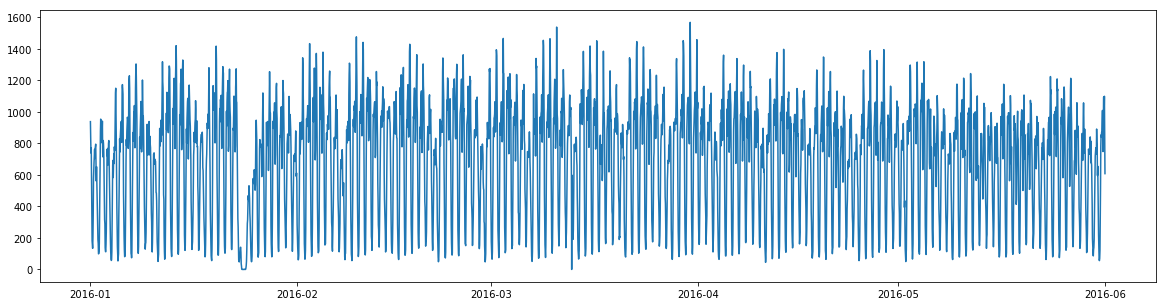

In [8]:
plt.figure(figsize=(20,5))
plt.plot(data.trips)
plt.show()

In [9]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.trips)[1])

Критерий Дики-Фуллера: p=0.000000


In [10]:
def add_sin(df,k,T):
    for i in range(1,k+1):
        df['s_'+str(i)]=np.sin(np.array(range(1,T+1))*2*np.pi*i/168)
    return df
def add_cos(df,k,T):
    for i in range(1,k+1):
        df['c_'+str(i)]=np.cos(np.array(range(1,T+1))*2*np.pi*i/168)
    return df
def add_ftr(df,k,T):
    df=add_sin(df,k,T)
    df=add_cos(df,k,T)
    return df
T=data.shape[0]
X=pd.DataFrame()
add_ftr(X,15,T)

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,c_6,c_7,c_8,c_9,c_10,c_11,c_12,c_13,c_14,c_15
0,0.037391,0.074730,1.119645e-01,1.490423e-01,0.185912,2.225209e-01,2.588190e-01,2.947552e-01,3.302791e-01,0.365341,...,9.749279e-01,9.659258e-01,0.955573,9.438833e-01,9.308737e-01,0.916562,0.900969,0.884115,8.660254e-01,8.467242e-01
1,0.074730,0.149042,2.225209e-01,2.947552e-01,0.365341,4.338837e-01,5.000000e-01,5.633201e-01,6.234898e-01,0.680173,...,9.009689e-01,8.660254e-01,0.826239,7.818315e-01,7.330519e-01,0.680173,0.623490,0.563320,5.000000e-01,4.338837e-01
2,0.111964,0.222521,3.302791e-01,4.338837e-01,0.532032,6.234898e-01,7.071068e-01,7.818315e-01,8.467242e-01,0.900969,...,7.818315e-01,7.071068e-01,0.623490,5.320321e-01,4.338837e-01,0.330279,0.222521,0.111964,6.123234e-17,-1.119645e-01
3,0.149042,0.294755,4.338837e-01,5.633201e-01,0.680173,7.818315e-01,8.660254e-01,9.308737e-01,9.749279e-01,0.997204,...,6.234898e-01,5.000000e-01,0.365341,2.225209e-01,7.473009e-02,-0.074730,-0.222521,-0.365341,-5.000000e-01,-6.234898e-01
4,0.185912,0.365341,5.320321e-01,6.801727e-01,0.804598,9.009689e-01,9.659258e-01,9.972038e-01,9.937122e-01,0.955573,...,4.338837e-01,2.588190e-01,0.074730,-1.119645e-01,-2.947552e-01,-0.467269,-0.623490,-0.757972,-8.660254e-01,-9.438833e-01
5,0.222521,0.433884,6.234898e-01,7.818315e-01,0.900969,9.749279e-01,1.000000e+00,9.749279e-01,9.009689e-01,0.781831,...,2.225209e-01,6.123234e-17,-0.222521,-4.338837e-01,-6.234898e-01,-0.781831,-0.900969,-0.974928,-1.000000e+00,-9.749279e-01
6,0.258819,0.500000,7.071068e-01,8.660254e-01,0.965926,1.000000e+00,9.659258e-01,8.660254e-01,7.071068e-01,0.500000,...,6.123234e-17,-2.588190e-01,-0.500000,-7.071068e-01,-8.660254e-01,-0.965926,-1.000000,-0.965926,-8.660254e-01,-7.071068e-01
7,0.294755,0.563320,7.818315e-01,9.308737e-01,0.997204,9.749279e-01,8.660254e-01,6.801727e-01,4.338837e-01,0.149042,...,-2.225209e-01,-5.000000e-01,-0.733052,-9.009689e-01,-9.888308e-01,-0.988831,-0.900969,-0.733052,-5.000000e-01,-2.225209e-01
8,0.330279,0.623490,8.467242e-01,9.749279e-01,0.993712,9.009689e-01,7.071068e-01,4.338837e-01,1.119645e-01,-0.222521,...,-4.338837e-01,-7.071068e-01,-0.900969,-9.937122e-01,-9.749279e-01,-0.846724,-0.623490,-0.330279,-1.836970e-16,3.302791e-01
9,0.365341,0.680173,9.009689e-01,9.972038e-01,0.955573,7.818315e-01,5.000000e-01,1.490423e-01,-2.225209e-01,-0.563320,...,-6.234898e-01,-8.660254e-01,-0.988831,-9.749279e-01,-8.262388e-01,-0.563320,-0.222521,0.149042,5.000000e-01,7.818315e-01


In [12]:
col=['s_1','s_7','s_14','c_1','c_7','c_14']
#col=['s_7', 'c_7', 's_14', 'c_13', 's_1', 'c_14', 'c_1', 'c_15', 's_6']
y=data.trips.values
lr=Lasso()
#lr=LinearRegression()
lr.fit(X[col],y)
#lr.fit(X,y)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [13]:
y_pred=lr.predict(X[col])
remains=y-y_pred

In [126]:
coef=pd.Series(data=np.abs(lr.coef_),index=X.columns)
coef.sort_values(ascending=False).index

Index(['s_7', 'c_7', 's_14', 'c_13', 's_1', 'c_14', 'c_1', 'c_15', 's_6',
       's_2', 'c_6', 's_12', 's_3', 's_13', 'c_4', 's_9', 'c_5', 's_15',
       'c_12', 'c_8', 's_4', 's_5', 's_10', 'c_11', 'c_3', 'c_9', 's_11',
       's_8', 'c_10', 'c_2'],
      dtype='object')

In [14]:
lr.score(X[col],y)
#lr.score(X,y)

0.74872319684078648

In [15]:
data['remains']=remains

Посмотрим на STL декомпозицию остатков

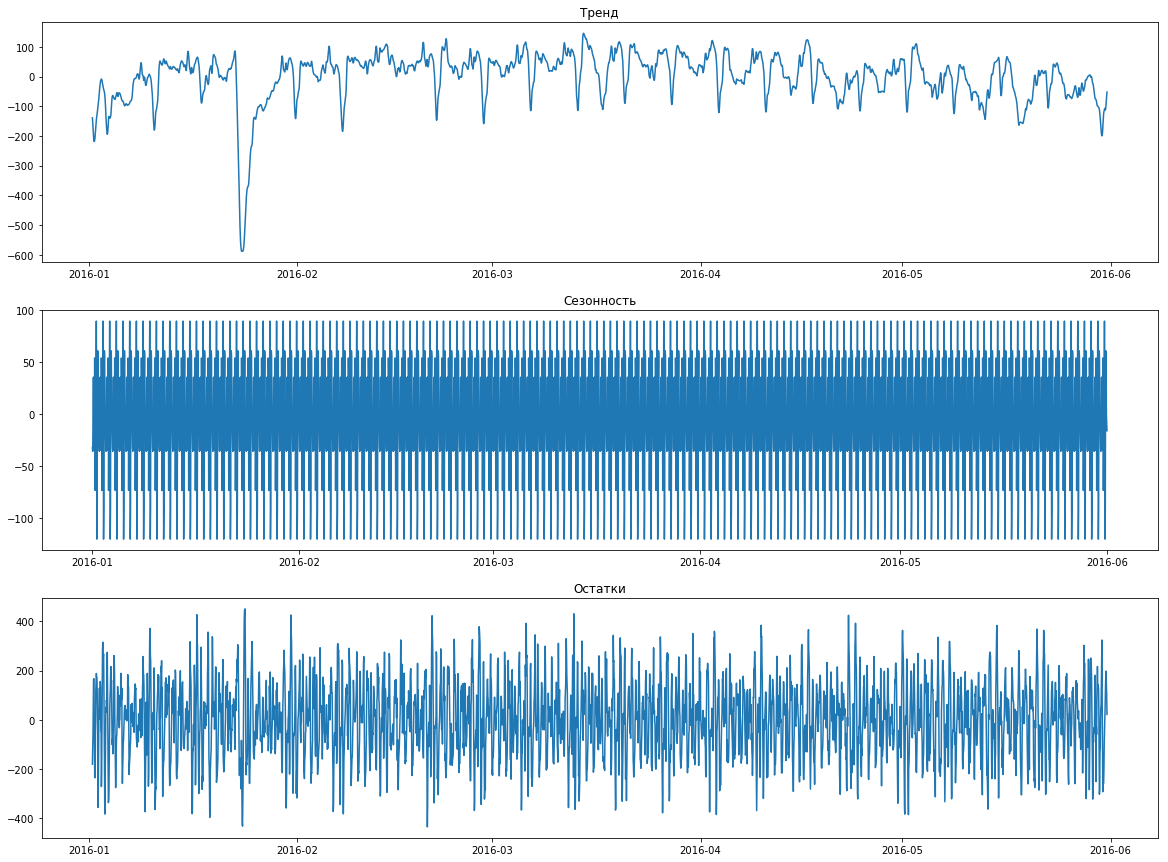

Критерий Дики-Фуллера: p= 7.40593038769e-13


In [17]:
def plot_sd(ts):
    sd=sm.tsa.seasonal_decompose(ts)
    fig, ax_arr = plt.subplots(3,figsize=(20,15))
    ax_arr[0].plot(sd.trend)
    ax_arr[0].set_title('Тренд')
    ax_arr[1].plot(sd.seasonal)
    ax_arr[1].set_title('Сезонность')
    ax_arr[2].plot(sd.resid)
    ax_arr[2].set_title('Остатки')
    plt.show()
    print("Критерий Дики-Фуллера: p=", sm.tsa.stattools.adfuller(ts)[1])
plot_sd(data.remains)

Попробуем продеференцировать


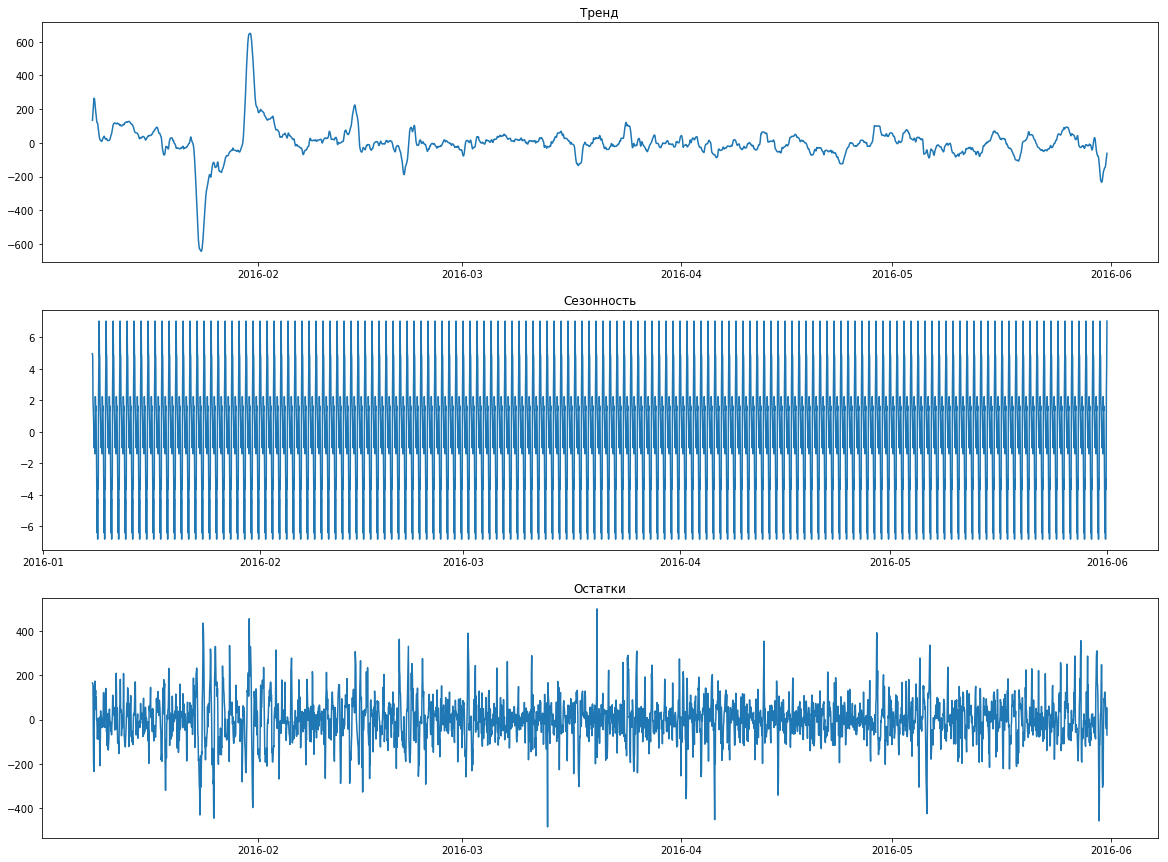

Критерий Дики-Фуллера: p= 1.27924946074e-11


In [18]:
data['remains_168']=data.remains-data.remains.shift(168)
plot_sd(data.remains_168[168:])

### Подбор модели, выбор начальных приближений для p,q,P,Q

Посмотрим на ACF и PACF полученного р¤да:

In [19]:
data.remains_168[168:].values.squeeze()

array([-318., -469., -528., ...,  -45.,  -83.,  -91.])

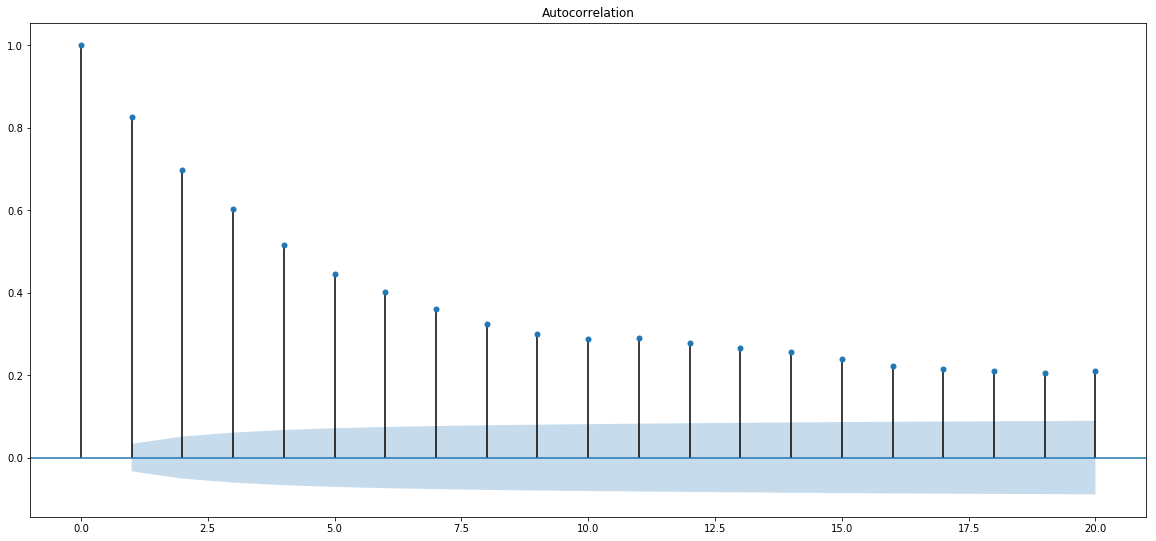

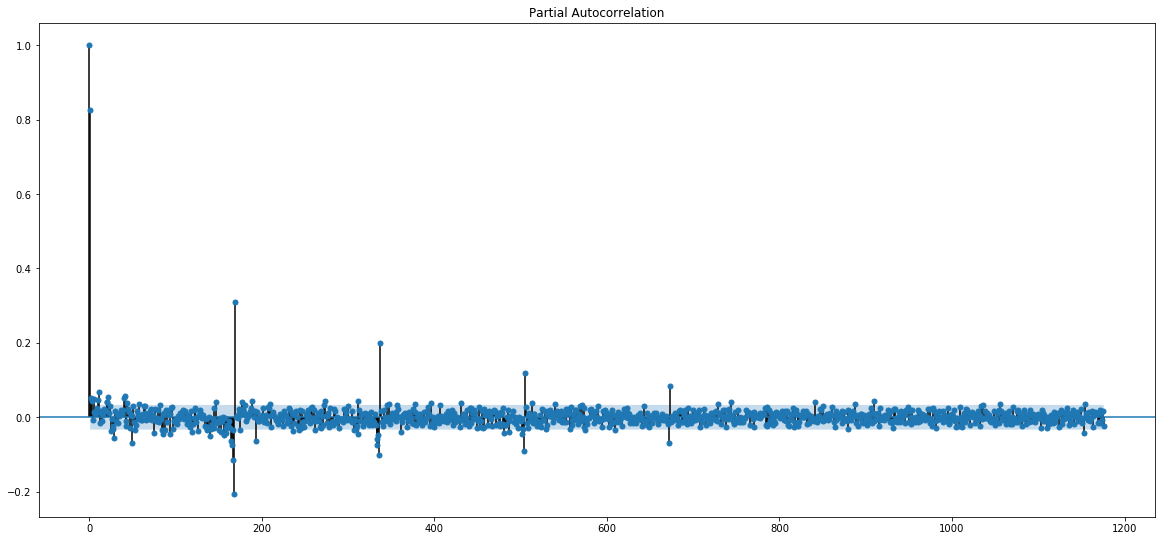

In [20]:
plt.figure(figsize(20,20))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(data.remains_168[168:].values.squeeze(), lags=20, ax=ax)
pylab.show()
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(data.remains_168[168:].values.squeeze(), lags=168*7, ax=ax)
pylab.show()

Начальные приближения: Q=1, q=16, P=1, p=2

In [23]:
ps = range(0, 2)
d=1
qs = range(0, 5)
Ps = range(0, 6)
D=1
Qs = range(0, 1)

In [24]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

TypeError: data type not understood

### Обучение и сравнение моделей-кандидатов, выбор победителя

In [209]:
%%time
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in parameters_list:
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.remains_168, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 168)).fit(disp=-1)
    #выводим параметры, на которых модель не обучаетс¤ и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохран¤ем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

wrong parameters: (0, 0, 0, 0)


MemoryError: 

In [205]:
# Подтверждаем, что модель с минимальным AIC
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

     parameters           aic
0  (0, 0, 1, 0)  38881.772518


In [206]:
# Смотрим на параметры модели
print(best_model.summary())

                                  Statespace Model Results                                 
Dep. Variable:                         remains_168   No. Observations:                 3648
Model:             SARIMAX(0, 1, 0)x(1, 1, 0, 168)   Log Likelihood              -19438.886
Date:                             Tue, 13 Jun 2017   AIC                          38881.773
Time:                                     16:47:05   BIC                          38894.176
Sample:                                 01-01-2016   HQIC                         38886.190
                                      - 05-31-2016                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L168     -0.6484      0.010    -62.583      0.000      -0.669      -0.628
sigma2      3239.0945     5

In [ ]:
# Визуальная оценка качества модели
data['model'] = best_model.fittedvalues
data['filled'] = data['model'].fillna(0)
data['LR'] = y_pred
data['total'] = data['filled'] + data['LR']

plt.figure(figsize=(20,5))
data.rides.plot()
data.total.plot(color='r')
plt.title(u'Сравнение фактического и предсказанного количества поездок')
plt.ylabel(u'Позедки')
plt.show()